# Modularity and Simulated annealing

**Definition**

The modularity Q of a graph is defined as follows:

$$Q= \sum_{i=1}^{n_c} \left[ \frac{l_c}{m} - \left(\frac{d_c}{2m}\right)^2 \right]$$

where:
- $n_c$ is the number of clusters
- $l_c$ the total number of edges joining vertices of cluster $c$
- $d_c$ the sum of the degrees of the vertices of cluster $c$

**Importation of necessary libraries**


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from Utils import *
from simulated_annealing import *

Our real dataset

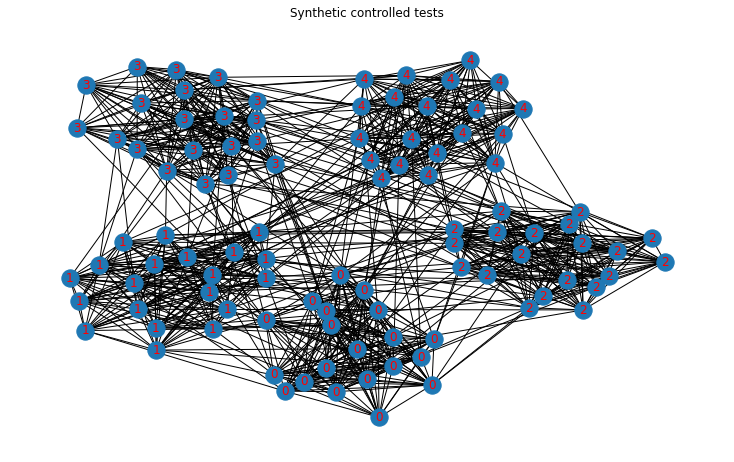

In [2]:
k=5
G = generate_known_cluster(100,k,0.7,0.1)
plot_graph_cluster(G,"Synthetic controlled tests")

**First approach: Finding the best parameters with a grid search**

In [ ]:
iterations = 5
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = np.arange(0.01,0.2,0.02)
best_params, best_score = grid_search(G, temperature_range, cooling_rate_range, iterations, k)

print("Meilleurs paramètres:", best_params)
print("Meilleur score de modularité:", best_score)

In [7]:
iterations=5
temperature=best_params['temperature']
cooling_rate=best_params['cooling_rate']

final_partition, final_score, scores = simulated_annealing(G, k, temperature, cooling_rate, iterations)

print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)

Final Partition: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 5, 61: 5, 62: 5, 63: 5, 64: 5, 65: 5, 66: 5, 67: 5, 68: 5, 69: 5, 70: 5, 71: 5, 72: 5, 73: 5, 74: 5, 75: 5, 76: 5, 77: 5, 78: 5, 79: 5, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2}
Final Modularity Score: 0.5713529986720882


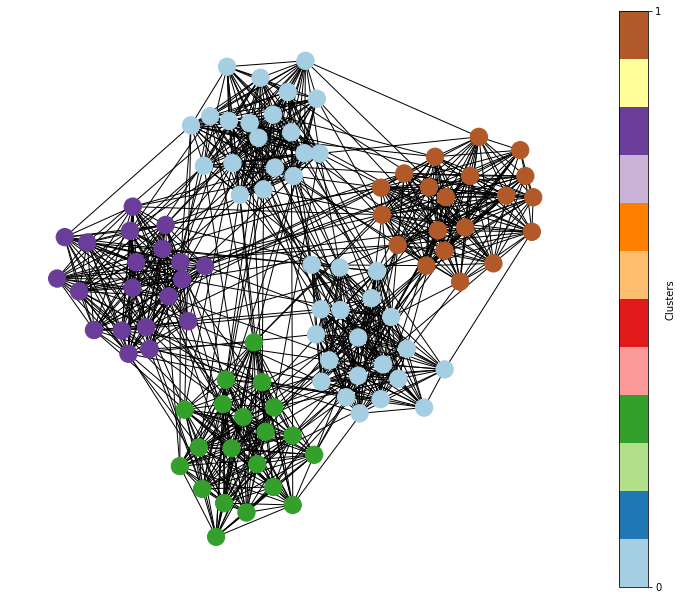

In [8]:
plot_graph(G,final_partition)

We are currently dealing with a challenge: the modularity measure may exhibit a preference for merging two clusters! Every time we run the algorithm, how it will behave is unpredictable: the grid search as it is doesn't work. To be sure we have a set of parameters that may work, we need to modify the grid search and instaure a threshold.

**Second approach: Modification of the grid search**

Pott's model strategically introduces a controlled level of noise to mitigate the risk of the model getting trapped in a local optimum. The key task at hand is to determine optimal parameters that strike a balance: introducing enough noise to facilitate the identification of the correct number of clusters while ensuring it does not exceed a threshold that would lead to a clustering outcome influenced solely by randomness. This delicate equilibrium is crucial to achieving meaningful and reliable results in the clustering process.

In [3]:
iterations=5
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = np.arange(0.01,0.05,0.01)
optimal_parameters=find_para(G,k,temperature_range,cooling_rate_range,iterations,0.6)

In [6]:
para=[(temperature,cooling_rate) for temperature,cooling_rate,_,_,_ in optimal_parameters]
print(para)

[(3, 0.02), (3, 0.03), (4, 0.04), (5, 0.02), (5, 0.03), (6, 0.03)]


In [22]:
elt= max(range(len(para)), key=lambda i: para[i][2])
temperature,cooling_rate,final_partition,final_score,scores=optimal_parameters[elt]
print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)

Final Partition: {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4}
Final Modularity Score: 0.6271043976013904


For all the sets of parameters found above, the modularity score doesn't change!

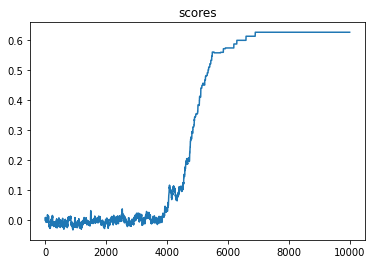

In [23]:
plt.plot(scores)
plt.title("scores")
plt.show()

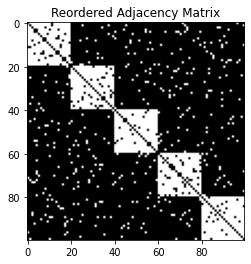

In [24]:
plot_adj(G,final_partition)

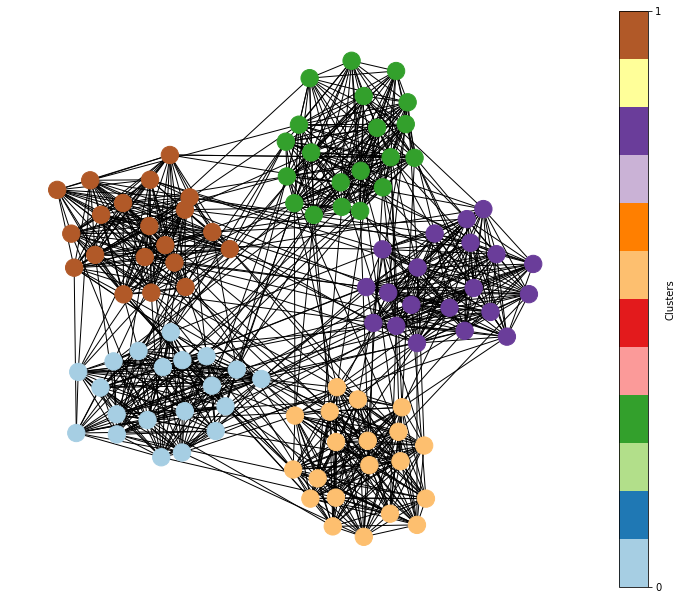

In [25]:
plot_graph(G,final_partition)

In [26]:
sens,spe=quality(nx.get_node_attributes(G,'spin'),final_partition)
print(sens,spe)

1.0 1.0


# Test on different graphs

In [20]:
iterations=30
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = np.arange(0.01,0.04,0.01)
kin=0.9
k=5
nodes=30
G = generate_known_cluster(nodes,k,kin,0.1)

optimal_parameters=find_para(G,k,temperature_range,cooling_rate_range,iterations,-1)

In [24]:
para=[(temperature,cooling_rate,final_score) for temperature,cooling_rate,_,final_score,_ in optimal_parameters]
elt= max(range(len(para)), key=lambda i: para[i][2])
print(para[elt])
temperature,cooling_rate,final_partition,final_score,scores=optimal_parameters[elt]
print(final_score)

(4, 0.03, 0.5284777176176594)
0.5284777176176594


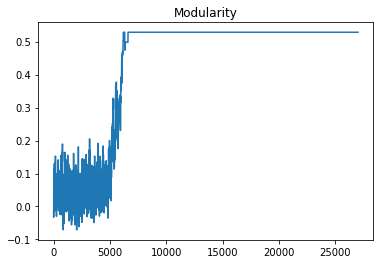

0.03633331865967543


In [25]:
plt.plot(scores)
plt.title("Modularity")
plt.show()
print(np.var(scores))

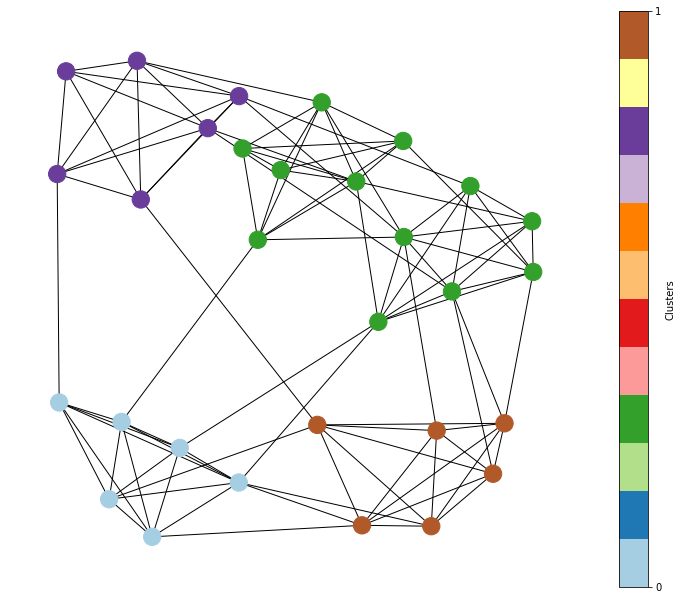

In [26]:
plot_graph(G,final_partition)

In [27]:
krange=np.arange(0.1,1.1,0.1)
spe_list=[]
sens_list=[]

for kin in krange:
    G = generate_known_cluster(nodes,5,kin,0.1)
    final_partition, final_score, scores = simulated_annealing(G, k, temperature, cooling_rate, iterations)
    sens,spe=quality(nx.get_node_attributes(G,'spin'),final_partition)
    spe_list.append(spe)
    sens_list.append(sens)

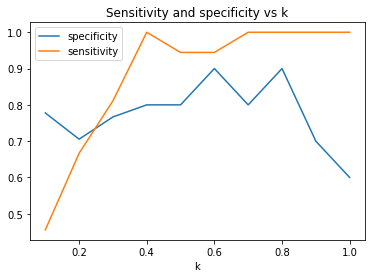

In [28]:
plt.plot(krange,spe_list,label='specificity')
plt.plot(krange,sens_list,label='sensitivity')
plt.title("Sensitivity and specificity vs k")
plt.xlabel("k")
plt.legend()
plt.show()

In [34]:
krange = np.arange(0.3, 1.1, 0.3)
sens_list = []
spe_list = []
clusters = np.arange(10, 50, 10)

for kin in krange:
    sens_kin = []
    spe_kin = []
    for c in clusters:
        G = generate_known_cluster(nodes, c, kin, 0.2)
        final_partition, final_score, scores = simulated_annealing(G, c, temperature, cooling_rate, iterations)
        sens, spe = quality(nx.get_node_attributes(G, 'spin'), final_partition)
        spe_kin.append(spe)
        sens_kin.append(sens)
    
    spe_list.append(spe_kin)
    sens_list.append(sens_kin)


/Users/chiararoverato/Documents/scolarite/Cours_CS/3A/ENS/Probabilistic Graphical Models/Projet/Graph-Clustering/Utils.py:28: RuntimeWarning: divide by zero encountered in long_scalars
  cluster = i//nodes_per_cluster
/Users/chiararoverato/Documents/scolarite/Cours_CS/3A/ENS/Probabilistic Graphical Models/Projet/Graph-Clustering/Utils.py:35: RuntimeWarning: divide by zero encountered in long_scalars
  cluster = i//nodes_per_cluster


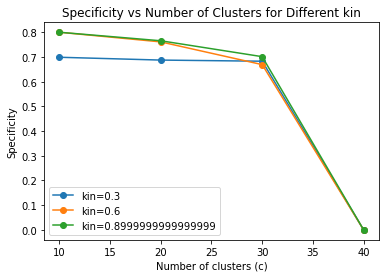

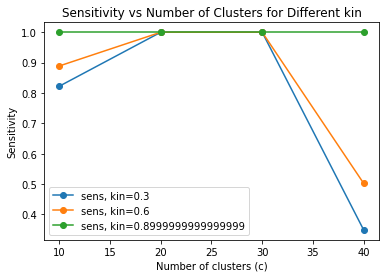

In [40]:
for i, kin in enumerate(krange):
    plt.plot(clusters, spe_list[i], label=f'kin={kin}', marker='o')

plt.xlabel('Number of clusters (c)')
plt.ylabel('Specificity')
plt.title('Specificity vs Number of Clusters for Different kin')
plt.legend()
plt.show()

for i, kin in enumerate(krange):
    plt.plot(clusters, sens_list[i], label=f'sens, kin={kin}', marker='o')

plt.xlabel('Number of clusters (c)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity vs Number of Clusters for Different kin')
plt.legend()
plt.show()



The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

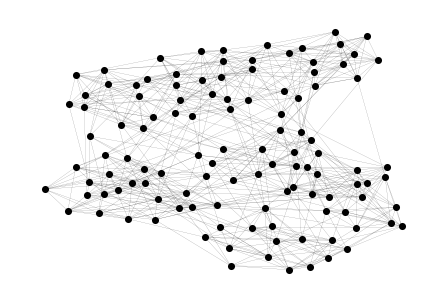

In [41]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G_foot = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G_foot.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G_foot, seed=1969)  # Seed for reproducible layout
nx.draw(G_foot, pos, **options)
plt.show()

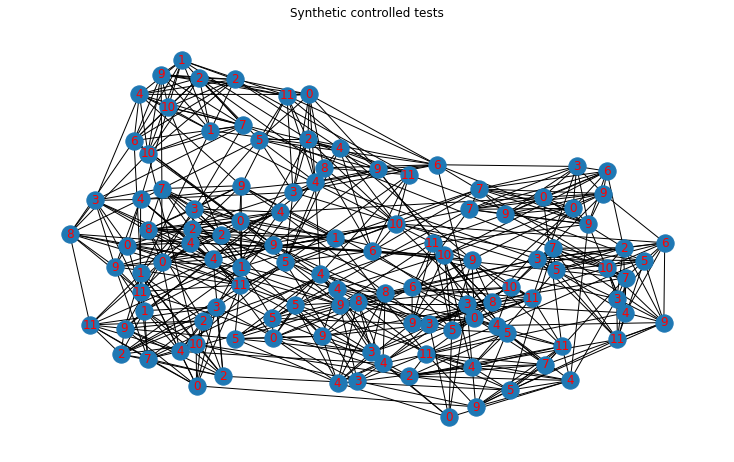

In [43]:
init_G_football = random_initialization(G_foot,12)
plot_graph_cluster(init_G_football,"Synthetic controlled tests")

In [52]:
iterations=3
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = np.arange(0.01,0.05,0.01)
optimal_parameters=find_para(G_foot,12,temperature_range,cooling_rate_range,iterations,0.-1)
para=[(temperature,cooling_rate,final_score) for temperature,cooling_rate,_,final_score,_ in optimal_parameters]

In [62]:
elt= max(range(len(para)), key=lambda i: para[i][2])
temperature,cooling_rate,final_partition,final_score,scores=optimal_parameters[elt]

final_partition, final_score, scores = simulated_annealing(G_foot, 12, temperature, cooling_rate, 5)

Final Partition: {'BrighamYoung': 10, 'FloridaState': 3, 'Iowa': 4, 'KansasState': 5, 'NewMexico': 10, 'TexasTech': 5, 'PennState': 4, 'SouthernCalifornia': 2, 'ArizonaState': 2, 'SanDiegoState': 10, 'Baylor': 5, 'NorthTexas': 2, 'NorthernIllinois': 12, 'Northwestern': 4, 'WesternMichigan': 12, 'Wisconsin': 4, 'Wyoming': 10, 'Auburn': 9, 'Akron': 12, 'VirginiaTech': 1, 'Alabama': 9, 'UCLA': 2, 'Arizona': 2, 'Utah': 10, 'ArkansasState': 2, 'NorthCarolinaState': 3, 'BallState': 12, 'Florida': 9, 'BoiseState': 2, 'BostonCollege': 1, 'WestVirginia': 1, 'BowlingGreenState': 12, 'Michigan': 4, 'Virginia': 3, 'Buffalo': 12, 'Syracuse': 1, 'CentralFlorida': 12, 'GeorgiaTech': 3, 'CentralMichigan': 12, 'Purdue': 4, 'Colorado': 5, 'ColoradoState': 10, 'Connecticut': 12, 'EasternMichigan': 12, 'EastCarolina': 6, 'Duke': 3, 'FresnoState': 11, 'OhioState': 4, 'Houston': 6, 'Rice': 11, 'Idaho': 2, 'Washington': 2, 'Kansas': 5, 'SouthernMethodist': 11, 'Kent': 12, 'Pittsburgh': 1, 'Kentucky': 9, 'Lou

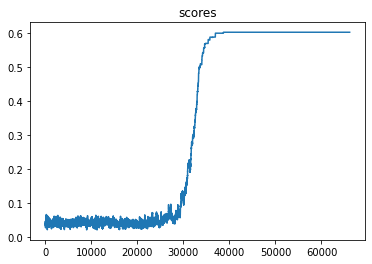

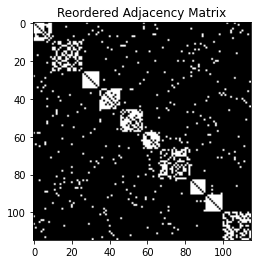

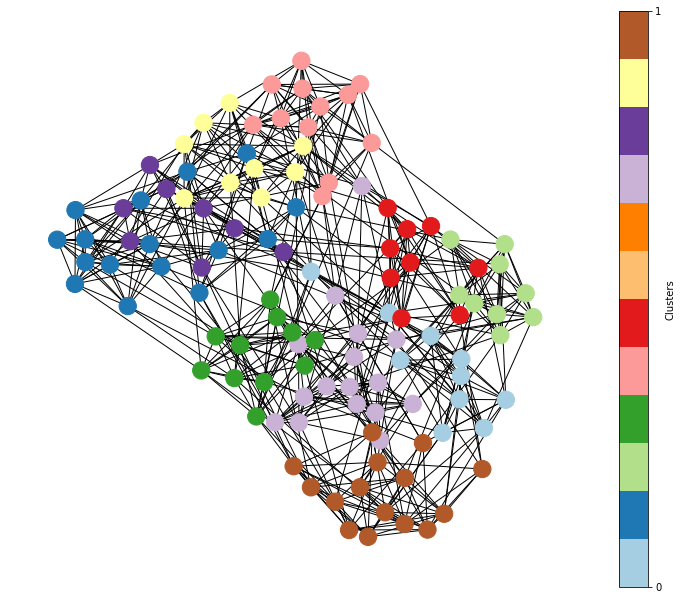

In [73]:
print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)
print(f"Nombre de clusters {len(set(final_partition.values()))}")

plt.plot(scores)
plt.title("scores")
plt.show()
plot_adj(G_foot,final_partition)
plot_graph(G_foot,final_partition)

To do:
- montrer qq exemples de modularité, pour le graph initial et pour le graph clusteré
- montrer le pb de résolution limite